# Introduction to Scikit-Learn: Machine Learning with Python

**Classification**

郭耀仁

## Supervised Learning

## About supervised learning

In **Supervised Learning**, we have a dataset consisting of both features and labels.
The task is to construct an estimator which is able to predict the label of an object
given the set of features.

## Some more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like
  (So-called *recommender systems*: a famous example is the [Netflix Prize](http://en.wikipedia.org/wiki/Netflix_prize)).

## Supervised learning is further broken down into two categories

- Classification
- Regression

## In classification, the label is discrete, while in regression, the label is continuous

- Classification: Credit card approval/rejection
- Regression: Monthly credit limit

## K nearest neighbors

## About K nearest neighbors

K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer

train_url = "https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/train.csv"
train = pd.read_csv(train_url)
X_train = train[["Fare", "Age"]].values
imputer = Imputer(strategy="median")
X_train = imputer.fit_transform(X_train)
y_train = train["Survived"].values
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [2]:
test_url = "https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/test.csv"
test = pd.read_csv(test_url)

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# How would our current kNN model predict the first passenger with Age=34.5, and Fare=7.8292?
import numpy as np

X_test = np.array([[34.5, 7.8292]]).reshape(1, 2)
knn.predict(X_test)

array([0])

We can also do probabilistic predictions:

In [5]:
knn.predict_proba(X_test)

array([[ 0.6,  0.4]])

Let's draw the decision boundary for our current kNN model:

In [6]:
import matplotlib.pyplot as plt

# Plotting decision regions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')

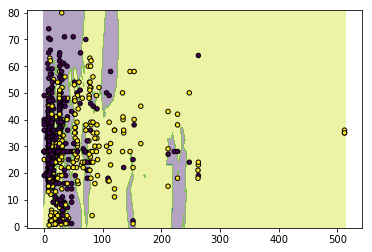

In [7]:
plt.show()

## Support Vector Machines

## About SVM

Support Vector Machines (SVMs) are a powerful supervised learning algorithm used for **classification**. SVMs are a **discriminative** classifier: that is, they draw a boundary between clusters of data.

In [8]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

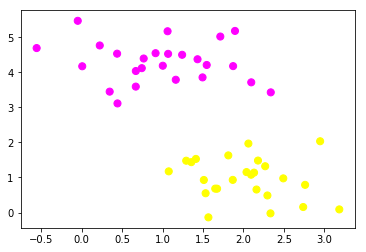

In [9]:
plt.show()

## A discriminative classifier attempts to draw a line between the two sets of data

We could come up with several possibilities which perfectly discriminate between the classes.

In [10]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

(-1, 3.5)

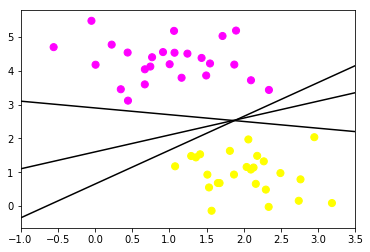

In [11]:
plt.show()

## How can we improve on this?

### Maximizing the *Margin*

Support vector machines are one way to address this. What support vector machined do is to not only draw a line, but consider a *region* about the line of some given width.

In [12]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

(-1, 3.5)

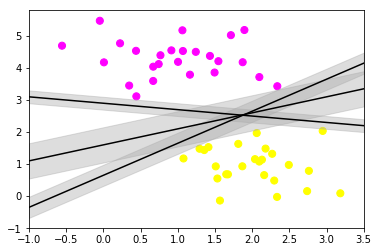

In [13]:
plt.show()

## If we want to maximize this width, the middle fit is clearly the best

## Fitting a Support Vector Machine

Now we'll fit a Support Vector Machine Classifier.

In [14]:
import pandas as pd
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC  # "Support Vector Classifier"

train_url = "https://storage.googleapis.com/kaggle_datasets/Titanic-Machine-Learning-from-Disaster/train.csv"
train = pd.read_csv(train_url)
X_train = train[["Fare", "Age"]].values
imputer = Imputer(strategy="median")
X_train = imputer.fit_transform(X_train)
y_train = train["Survived"].values
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Plot SVM decision boundaries

In [15]:
import matplotlib.pyplot as plt

# Plotting decision regions
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')

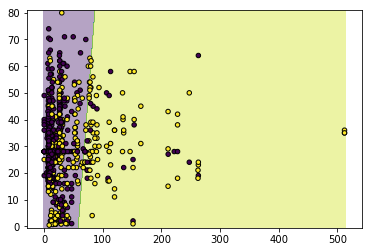

In [16]:
plt.show()

## Kernel Methods

Where SVM gets incredibly exciting is when it is used in conjunction with *kernels*, which is some functional transformation of the input data.

In [17]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# Plotting decision regions
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')

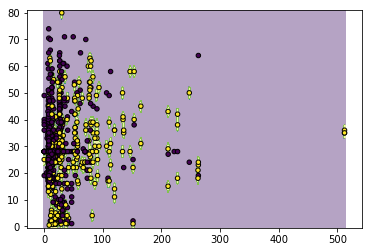

In [18]:
plt.show()

## Random Forest

## About Random Forest

Random forests are an example of an ensemble learner built on decision trees. Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

## Creating a Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Plotting decision regions
Z = dt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')

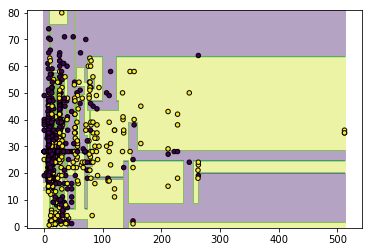

In [20]:
plt.show()

## Ensembles of Estimators

An **Ensemble Method** is a meta-estimator which essentially averages the results of many individual estimators. Somewhat surprisingly, the resulting estimates are much more robust and accurate than the individual estimates which make them up!

## One of the most common ensemble methods

**Random Forest**, in which the ensemble is made up of many decision trees.

In [21]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

# Plotting decision regions
Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolor='k')

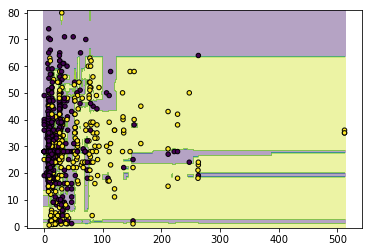

In [22]:
plt.show()